In [ ]:
import numpy as np
import matplotlib.pyplot as plt

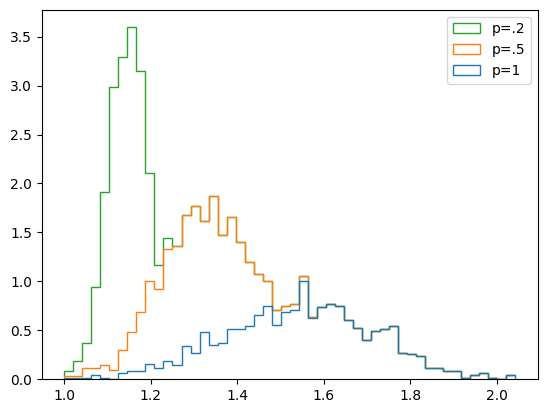

In [ ]:
### COMPARE HISTOGRAMS OF DISTACE FOR RANDOM MATCHINGS
### Conclusion: when p<<1, everything gets porportionally bunched together

n = 25

lin = []
hlf = []
two = []

reds = np.random.rand(n)
reds.sort()
blues = np.random.rand(n)
blues.sort()

rng = np.random.default_rng()

for k in range(1000):
    new_blues = rng.permutation(blues)
    dists = np.abs(reds-new_blues)

    lin.append(np.sum(dists))
    hlf.append(np.sum(np.power(dists, 0.5)))
    two.append(np.sum(np.power(dists, 0.2)))

lin = lin/np.min(lin)
hlf = hlf/np.min(hlf)
two = two/np.min(two)

data = np.array([lin, hlf, two]).T

plt.hist(data, 50, density=True, histtype='step', stacked=True, fill=False, label=["p=1", "p=.5", "p=.2"])
plt.legend()
plt.show()

In [ ]:
# Calculate the distance for a certain
# matching and value of p
def p_dist(reds, blues, pairs, p):
    total = 0
    for pair in pairs:
        total += np.power( np.abs( reds[pair[0]]-blues[pair[1]] ), p)
    return total

In [ ]:
# Visualize a matching with both circles and lines
def visualize(matching, title):
    figure, axes = plt.subplots(1,2, figsize=[8, 4])
    figure.suptitle(title, fontsize=20)
    # Circle visualization
    axes[0].set_aspect( 1 )
    for x in range(n):
        r_pos = reds[matching[x][0]]
        b_pos = blues[matching[x][1]]
        circle = plt.Circle( ( (r_pos+b_pos)/2, 0.5), (r_pos-b_pos)/2, fill=False)
        axes[0].add_artist( circle )

    # Line visualization
    axes[1].set_aspect( 1 )
    axes[1].set_xlim([0,1])
    axes[1].set_ylim([0,1])
    for x in range(n):
        r_pos = reds[matching[x][0]]
        b_pos = blues[matching[x][1]]

        axes[1].plot( (r_pos, b_pos), (0.8, 0.2), color='k', linewidth=0.5)
        axes[1].scatter( r_pos, 0.8, color='r')
        axes[1].scatter( b_pos, 0.2, color='b')

    print(f"p=0.1 : {p_dist(reds, blues, matching, 0.1)}")
    print(f"p=0.5 : {p_dist(reds, blues, matching, 0.5)}")
    print(f"p=1 : {p_dist(reds, blues, matching, 1)}")
    plt.show()

p=0.1 : 20.48702368167618
p=0.5 : 9.999563216004862
p=1 : 4.467539351290116


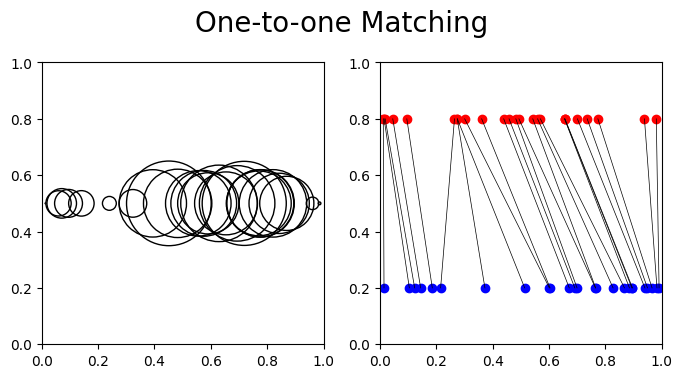

In [ ]:
# Match the nth red point to the nth blue point
# (assume lists are sorted)
def one_to_one(reds, blues):
    n = len(reds)
    return np.array([np.arange(n), np.arange(n)]).T

one_to_one_matching = one_to_one(reds, blues)
visualize(one_to_one_matching, "One-to-one Matching")

p=0.1 : 18.63404832936719
p=0.5 : 8.185065054388835
p=1 : 4.663787288541856


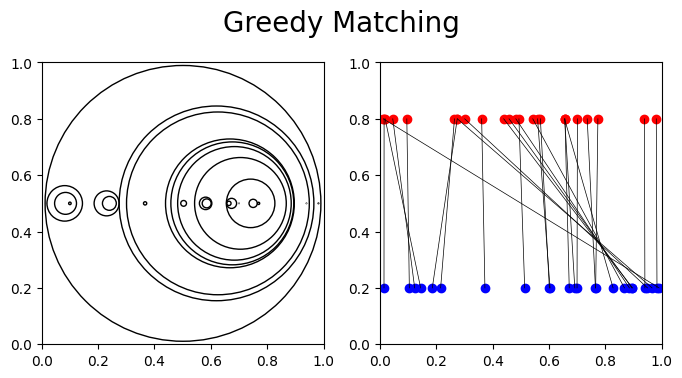

In [ ]:
# assume lists are sorted
# returns array of matched pairs [[1,1], [2,2], etc]
def greedy(reds, blues):
    RR, BB = np.meshgrid(blues, reds)
    DISTS = np.abs(RR-BB)
    n = len(reds)
    red_vals = list(range(n))
    blue_vals = list(range(n))

    output = []
    for _ in range(n):
        # Find minimum distace of remaining
        min_pair = np.unravel_index(DISTS.argmin(), DISTS.shape)

        # Find corresponding original indices and add to output
        index_pair = (red_vals.pop(min_pair[0]), blue_vals.pop(min_pair[1]))
        output.append(index_pair)

        # Remove corresponding rows and columns from grid
        DISTS = np.delete(DISTS, min_pair[0], 0)
        DISTS = np.delete(DISTS, min_pair[1], 1)
    return output


greedy_matching = greedy(reds, blues)
visualize(greedy_matching, "Greedy Matching")


p=0.1 : 19.0266387941526
p=0.5 : 8.346854792798165
p=1 : 4.467539351290117


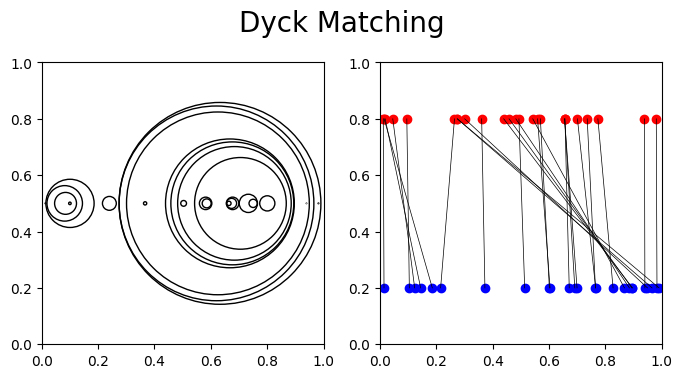

In [ ]:
# assume lists are sorted
# returns array of matched pairs [[1,1], [2,2], [r, b] etc]
def dyck(reds, blues):

    red_index = 0
    blue_index = 0
    n = len(reds)

    output = []

    stack = []
    stack_is_red = True

    while red_index < n or blue_index < n:

        next_is_red = True
        if red_index == n:
            next_is_red = False # all reds done
        elif blue_index == n:
            next_is_red = True  # all blues done
        else:
            next_is_red = reds[red_index] <= blues[blue_index]


        # next point is red
        if next_is_red:
            if len(stack) == 0 or stack_is_red:
                stack.append(red_index)
                stack_is_red = True
            else:
                output.append( (red_index, stack.pop()) )
            red_index += 1

        # next point is blue
        else:
            if len(stack) == 0 or not stack_is_red:
                stack.append(blue_index)
                stack_is_red = False
            else:
                output.append( (stack.pop(), blue_index) )
            blue_index += 1

    return output

dyck_matching = dyck(reds, blues)
visualize(dyck_matching, "Dyck Matching")

In [ ]:
### This set of reds and blues seemed to have some interesting properties
### (Note to investigate later)
# [0.0527274  0.07125104 0.08432089 0.11413077 0.18410164 0.26081616
#  0.31222069 0.3437707  0.37960245 0.42041905 0.43608202 0.44849165
#  0.48557047 0.49456687 0.49612385 0.52784053 0.65610501 0.67253226
#  0.69279035 0.72578997 0.84163407 0.84864741 0.86367405 0.91252257
#  0.92962344]
# [0.16003497 0.19029451 0.26915473 0.28103136 0.29524352 0.33977031
#  0.35413051 0.36126563 0.38799385 0.40858501 0.44985152 0.45582021
#  0.46070876 0.46854786 0.5029027  0.50741822 0.52366619 0.54405538
#  0.62209933 0.73177872 0.77883397 0.83906494 0.89556625 0.90115349
#  0.94117263]

p=0.2: one-to-one 50.115720135202885, greedy 39.784980796048266, dyck 42.3202252512902
p=0.5: one-to-one 18.938754497053896, greedy 13.851225640231016, dyck 14.635396541684528
p=1: one-to-one 4.376278992753645, greedy 5.083532426848369, dyck 4.376278992753645


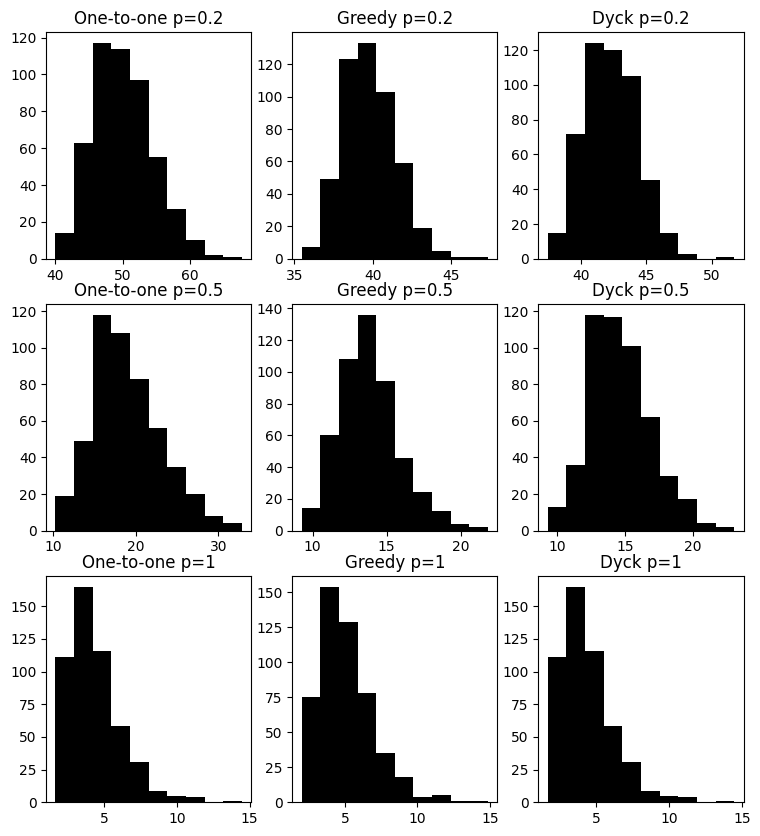

In [ ]:
### Trying to COMPARE  DISTACE FOR MATCHINGS at different values of P
### Goal: find reasonable way to compare efficiently across p

n = 100

rng = np.random.default_rng()

PS = [0.2, 0.5, 1]
fig, axes = plt.subplots(3, 3, figsize =[9,10])

for p_index in range(3):
    p = PS[p_index]
    one_one_scores =[]
    greedy_scores = []
    dyck_scores = []
    for k in range(500):
        reds = np.random.rand(n)
        reds.sort()
        blues = np.random.rand(n)
        blues.sort()

        one_to_one_matching = one_to_one(reds, blues)
        greedy_matching = greedy(reds, blues)
        dyck_matching = dyck(reds, blues)

        one_one_scores.append(p_dist(reds, blues, one_to_one_matching, p))
        greedy_scores.append(p_dist(reds, blues, greedy_matching, p))
        dyck_scores.append(p_dist(reds, blues, dyck_matching, p))

    print(f"p={p}: one-to-one {np.mean(one_one_scores)}, greedy {np.mean(greedy_scores)}, dyck {np.mean(dyck_scores)}")
    axes[p_index, 0].hist(one_one_scores, color='k')
    axes[p_index, 1].hist(greedy_scores, color='k')
    axes[p_index, 2].hist(dyck_scores, color='k')
    axes[p_index, 0].set_title(f"One-to-one p={p}")
    axes[p_index, 1].set_title(f"Greedy p={p}")
    axes[p_index, 2].set_title(f"Dyck p={p}")

plt.show()

